In [14]:
pip install scikit-learn -v

Using pip 21.2.4 from C:\Users\Badawy\anaconda3\lib\site-packages\pip (python 3.9)
Note: you may need to restart the kernel to use updated packages.


In [1]:

from preprocessing import * # Call preprocessing file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### ----------------------------------------------------------------------------------------------------
## Check The Train Data Is Balanced

<AxesSubplot:>

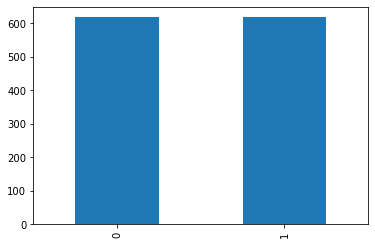

In [2]:
y_train_balanced.value_counts().plot.bar()

## ----------------------------------------------------------------------------------------------------
# Import Model 

In [10]:
from sklearn.linear_model import LogisticRegression #import Model
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler # to Make Features Scaling
from sklearn.metrics import accuracy_score #To clac Accuarcy 

### ----------------------------------------------------------------------------------------------------
## Function To Make [Train Model] And [Return Accuracy] of Train and Validation 

- Take 4 parameter ( 
                     model [Which Trained],
                     X_train [Data_input Which Model Will used To Learn],
                     y_train [Data_output Which Model Will used To Learn],
                     X_val [Data_input Which Model used To be pridect output based on what Lean],
                     y_val [Data_output Which Model used To be Check output Validation])

In [11]:
def train_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train) # Train Model 
    y_pred_train = model.predict(X_train) #Store Predict Output For Train input
    y_pred_val = model.predict(X_val) #Store Predict Output For Validation input
    acc_train = accuracy_score(y_train, y_pred_train) #Calc Accuarcy Between Real Output And predict OutPut Then Store Accuarcy
    acc_val = accuracy_score(y_val, y_pred_val) 
    return acc_train, acc_val 

# MODEl

In [15]:
model = Pipeline([ 
    ('feature_scaling', StandardScaler()), # First Stage To Make Features Scaling
    ('logistic_regression', LogisticRegression(random_state=0)) # Secound Stage Using Model 
])
train_model(model, X_train_balanced, y_train_balanced, X_val, y_val) #Call Function Train And Send paraemter
# ( acc_train , acc_val ) 

(0.7888349514563107, 0.7834319526627219)

## -----------------------------------------------------------------------
# Hyperparameter tuning: C
The C hyperparameter is a regularization hyperparameter. It usually (but not always) has the following effect:
1. Smaller values for C:
    - High regularization
    - Reduces overfitting
    - But too small values can make accuracy very low
2. Larger values for C:
    - Low regularization
    - High training accuracy
    - Can lead to overfitting

In [21]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_train_values = [] #Store Accuarcy Train
acc_val_values = [] #Store Accuarcy Validation

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('logistic_regression', LogisticRegression(C=C, random_state=0)) # Using C Hyperparameter Tuning
    ])
    acc_train, acc_val = train_model(model, X_train_balanced, y_train_balanced, X_val, y_val)
    acc_train_values.append(acc_train) #To Add In List 
    acc_val_values.append(acc_val)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values
})
results

,C,acc_train,acc_val
0,0.0001,0.737864,0.746746
1,0.0010,0.748382,0.763314
2,0.0100,0.771845,0.785799
3,0.1000,0.789644,0.782249
4,1.0000,0.788835,0.783432
5,10.0000,0.788026,0.786982
6,100.0000,0.788026,0.786982
7,1000.0000,0.788026,0.786982
8,10000.0000,0.788026,0.786982


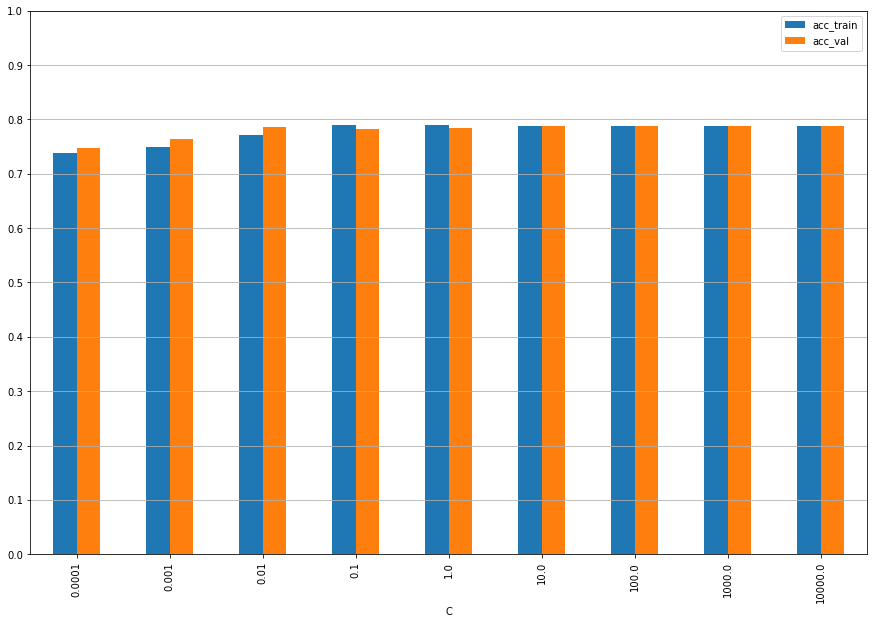

In [27]:
import numpy as np
import matplotlib.pyplot as plt #to Draw
%matplotlib inline 

results.plot.bar(x='C', y=['acc_train', 'acc_val'], figsize=(15, 10))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

# Testing best model Using C = 10

In [43]:
model_best = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('logistic_regression', LogisticRegression(C=10, random_state=0))
])
model_best.fit(X_train_balanced, y_train_balanced)
y_pred_test = model_best.predict(X_test)
print("Accuarcy of Model =", accuracy_score(y_test, y_pred_test))
print("Accuarcy of Model (percentage) =", round(accuracy_score(y_test, y_pred_test), 2)*100 ,"%")

Accuarcy of Model = 0.8029801324503312
Accuarcy of Model (percentage) = 80.0 %
